In [1]:
pip install reportlab matplotlib pandas pillow


Note: you may need to restart the kernel to use updated packages.


--- ENGINEERING PROBABILITY SOLUTIONS ---

--- Activity 1: Concrete Cylinder Testing ---
1. Sample Space: ['PPP', 'PPF', 'PFP', 'PFF', 'FPP', 'FPF', 'FFP', 'FFF']
2. Total Outcomes: 8
3. Event A (At least 2 Pass): ['PPP', 'PPF', 'PFP', 'FPP']
4. Probability P(A): 4/8 = 0.50

--- Activity 2: Microchip Reliability ---
1. Empirical Probability (Failure): 10/50 = 0.20
2. Expected Failures in 200 chips: 40
3. Consistent with 0.15 theoretical? Yes

--- Activity 3: Resistor Quality Control ---
a) P(Both Defective): 0.10
b) P(Exactly One Defective): 0.60
c) P(None Defective): 0.30

--- Activity 4: Network Failures (Graph Generated) ---
1a. P(No Failures): 0.1429
1b. P(2+ Failures): 0.4286
2. Expected 'No Failure' days in a month: 4.29
(Graph saved as 'activity4_graph.png')

--- Activity 5: Sensor System (Complement) ---
1. P(Successfully Detects): 0.97
2. P(At least one miss in 10): 0.2626

--- Activity 6: Construction Delays (Addition) ---
1. P(Shortage OR Weather): 0.45

--- Activity 7: Hard

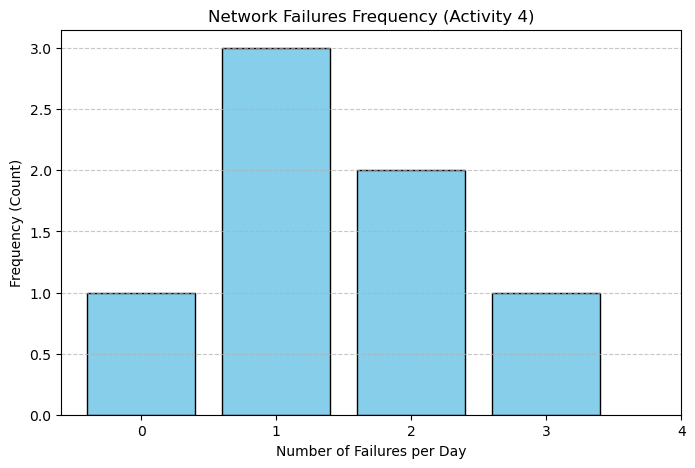

In [4]:
import matplotlib.pyplot as plt
import itertools
import math
import numpy as np

def main():
    print("--- ENGINEERING PROBABILITY SOLUTIONS ---\n")

    # ==========================================
    # PART 1: Basic Concepts
    # ==========================================
    print("--- Activity 1: Concrete Cylinder Testing ---")
    # Context: Testing 3 cylinders [cite: 14]
    outcomes = list(itertools.product(['P', 'F'], repeat=3))
    sample_space = ["".join(o) for o in outcomes]
    event_A = [o for o in outcomes if o.count('P') >= 2] # "At least two pass" [cite: 17]
    
    print(f"1. Sample Space: {sample_space}")
    print(f"2. Total Outcomes: {len(sample_space)}")
    print(f"3. Event A (At least 2 Pass): {[''.join(o) for o in event_A]}")
    print(f"4. Probability P(A): {len(event_A)}/{len(sample_space)} = {len(event_A)/len(sample_space):.2f}\n")

    print("--- Activity 2: Microchip Reliability ---")
    # Context: 50 chips, 10 fail 
    n_total = 50
    n_fail = 10
    emp_prob = n_fail / n_total
    expected_fail_200 = 200 * emp_prob
    
    print(f"1. Empirical Probability (Failure): {n_fail}/{n_total} = {emp_prob:.2f}")
    print(f"2. Expected Failures in 200 chips: {expected_fail_200:.0f}")
    print(f"3. Consistent with 0.15 theoretical? {'Yes' if abs(emp_prob - 0.15) < 0.1 else 'No'}\n")

    # ==========================================
    # PART 2: Classical & Empirical Applications
    # ==========================================
    print("--- Activity 3: Resistor Quality Control ---")
    # Context: Batch of 5, 2 defective. Pick 2. [cite: 38]
    total_combos = math.comb(5, 2)
    # Both defective (2 def, 0 good)
    p_both_def = math.comb(2, 2) * math.comb(3, 0) / total_combos
    # One defective (1 def, 1 good)
    p_one_def = math.comb(2, 1) * math.comb(3, 1) / total_combos
    # None defective (0 def, 2 good)
    p_none_def = math.comb(2, 0) * math.comb(3, 2) / total_combos
    
    print(f"a) P(Both Defective): {p_both_def:.2f}")
    print(f"b) P(Exactly One Defective): {p_one_def:.2f}")
    print(f"c) P(None Defective): {p_none_def:.2f}\n")

    print("--- Activity 4: Network Failures (Graph Generated) ---")
    # Context: Weekly failure data [cite: 51]
    data = [2, 0, 1, 3, 2, 1, 1] # Mon-Sun
    days = 7
    p_no_fail = data.count(0) / days
    p_2plus_fail = len([x for x in data if x >= 2]) / days
    expected_no_fail_30 = 30 * p_no_fail
    
    print(f"1a. P(No Failures): {p_no_fail:.4f}")
    print(f"1b. P(2+ Failures): {p_2plus_fail:.4f}")
    print(f"2. Expected 'No Failure' days in a month: {expected_no_fail_30:.2f}")
    
    # Graphing for Activity 4 [cite: 58]
    categories, counts = np.unique(data, return_counts=True)
    plt.figure(figsize=(8, 5))
    plt.bar(categories, counts, color='skyblue', edgecolor='black')
    plt.title("Network Failures Frequency (Activity 4)")
    plt.xlabel("Number of Failures per Day")
    plt.ylabel("Frequency (Count)")
    plt.xticks(range(0, max(data)+2))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig("activity4_graph.png")
    print("(Graph saved as 'activity4_graph.png')\n")

    # ==========================================
    # PART 3: Probability Rules
    # ==========================================
    print("--- Activity 5: Sensor System (Complement) ---")
    # Context: P(fail to detect) = 0.03 [cite: 61]
    p_fail_det = 0.03
    p_success_det = 1 - p_fail_det
    # P(at least one undetected in 10) = 1 - P(all detected)
    p_at_least_one_miss = 1 - (p_success_det ** 10)
    
    print(f"1. P(Successfully Detects): {p_success_det:.2f}")
    print(f"2. P(At least one miss in 10): {p_at_least_one_miss:.4f}\n")

    print("--- Activity 6: Construction Delays (Addition) ---")
    # Context: P(Shortage)=0.25, P(Weather)=0.30, P(Both)=0.10 [cite: 72]
    p_A = 0.25
    p_B = 0.30
    p_A_and_B = 0.10
    p_A_or_B = p_A + p_B - p_A_and_B
    
    print(f"1. P(Shortage OR Weather): {p_A_or_B:.2f}\n")

    print("--- Activity 7: Hardware Reliability (Multiplication) ---")
    # Context: P(Overheat)=0.05, P(Fan)=0.02 [cite: 81]
    p_heat = 0.05
    p_fan = 0.02
    p_both_hw = p_heat * p_fan
    p_any_hw = p_heat + p_fan - p_both_hw
    
    print(f"1. P(Both Fail): {p_both_hw:.4f}")
    print(f"2. P(At least one Fails): {p_any_hw:.4f}")

if __name__ == "__main__":
    main()